Heart Disease Prediction Using Machine Learning
A Data Science project for CoderGirl using the Heart Disease UCI dataset: https://www.kaggle.com/ronitf/heart-disease-uci.

Background
In its entirety, the Cleveland database contains 76 attributes and classifies patients based on the absence or presence of heart disease. However, for this project, a subset of the following 14 attributes is being used:

Age (age in years)
Sex (0 = female; 1 = male)
CP (chest pain type)
TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
CHOL (serum cholesterol in mg/dl)
FPS (fasting blood sugar > 120 mg/dl) (0 = false; 1 = true)
RESTECH (resting electrocardiographic results)
THALACH (maximum heart rate achieved)
EXANG (exercise induced angina (0 = no; 1 = yes))
OLDPEAK (ST depression induced by exercise relative to rest)
SLOPE (the slope of the peak exercise ST segment)
CA (number of major vessels (0-3) colored by fluoroscopy)
THAL (3 = normal; 6 = fixed defect; 7 = reversible defect)
TARGET (0 = no disease; 1 = heart disease)
Project
This mini-project is divided into three phases:



# Exploratory data analysis


Import Libraries and Load the Data



In [12]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [13]:
#loading the data
hd = pd.read_csv('heart.csv')

Get to Know the Data



In [14]:
#sample data
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


View Statistics



In [15]:
#finding the statistics of data
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Examine Potentially Erroneous Values

First feature : Thal

I noticed that the Thal feature only had 3 described datatypes: fixed defect, normal, and reversible defect.



However, in the statistics data above ,if you see min value of thal feature, I could see value of 0. I could not find any information on the meaning of this category.


Let's look more closely at the data in those rows.


In [16]:
hd.loc[hd.loc[:,'thal']==0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Since its categorical value I wont be able to take mean/median and replace the value with that. I will find out mode of people with heart disease and without heart disease and replace that values with this.

In [17]:
HD_yes=hd.loc[hd.loc[:,'target']==1]
HD_no=hd.loc[hd.loc[:,'target']==0]
print("Most common Thalium Stress Test result in those dianosed with Heart Disease:", HD_yes.thal.mode())
print("Most common Thalium Stress Test result in those dianosed without Heart Disease:", HD_no.thal.mode())


Most common Thalium Stress Test result in those dianosed with Heart Disease: 0    2
dtype: int64
Most common Thalium Stress Test result in those dianosed without Heart Disease: 0    3
dtype: int64


In [18]:
#now replacing these values to that row.
hd.loc[48, 'thal']=2.0
hd.loc[281, 'thal']=3.0


Next feature :ca

I noticed that the CA feature only had 0-3 VALUES

However, in the statistics data above ,if you see max value of ca feature, I could see value of 4. I could not find any information on the meaning of this category.

Let's look more closely at the data in those rows.


In [19]:
hd.loc[hd.loc[:,'ca']==4]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2.0,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3.0,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3.0,0


Since its categorical value I wont be able to take mean/median and replace the value with that. I will find out mode of people with heart disease and without heart disease and replace that values with this.

In [20]:
PHD=hd.loc[hd.loc[:,'target']==1]
AHD=hd.loc[hd.loc[:,'target']==0]
print("Most common Ca Test result in those dianosed with Heart Disease:", PHD.ca.mode())
print("Most common ca Test result in those dianosed without Heart Disease:", AHD.ca.mode())


Most common Ca Test result in those dianosed with Heart Disease: 0    0
dtype: int64
Most common ca Test result in those dianosed without Heart Disease: 0    0
dtype: int64


In [21]:
#now replacing these values to that row.
hd.loc[92, 'ca']=0
hd.loc[158, 'ca']=0
hd.loc[163, 'ca']=0
hd.loc[251, 'ca']=0


Finding other statistics of the dataset

In [22]:
#finding the number of rows and columns
hd.shape

(303, 14)

In [23]:
#Finding the count of people with disesase as per age
hd.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [24]:
#finding the data types of columns
hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal        float64
target        int64
dtype: object

# Check for Duplicates



In [25]:
# check for duplicate observations
hd[hd.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [26]:
# drop duplicate observation
hd = hd.drop_duplicates()


In [27]:
# verify duplicate was removed
hd[hd.duplicated() == True]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# Missing Values

In [28]:
#finding missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Outliers

Finding outliers

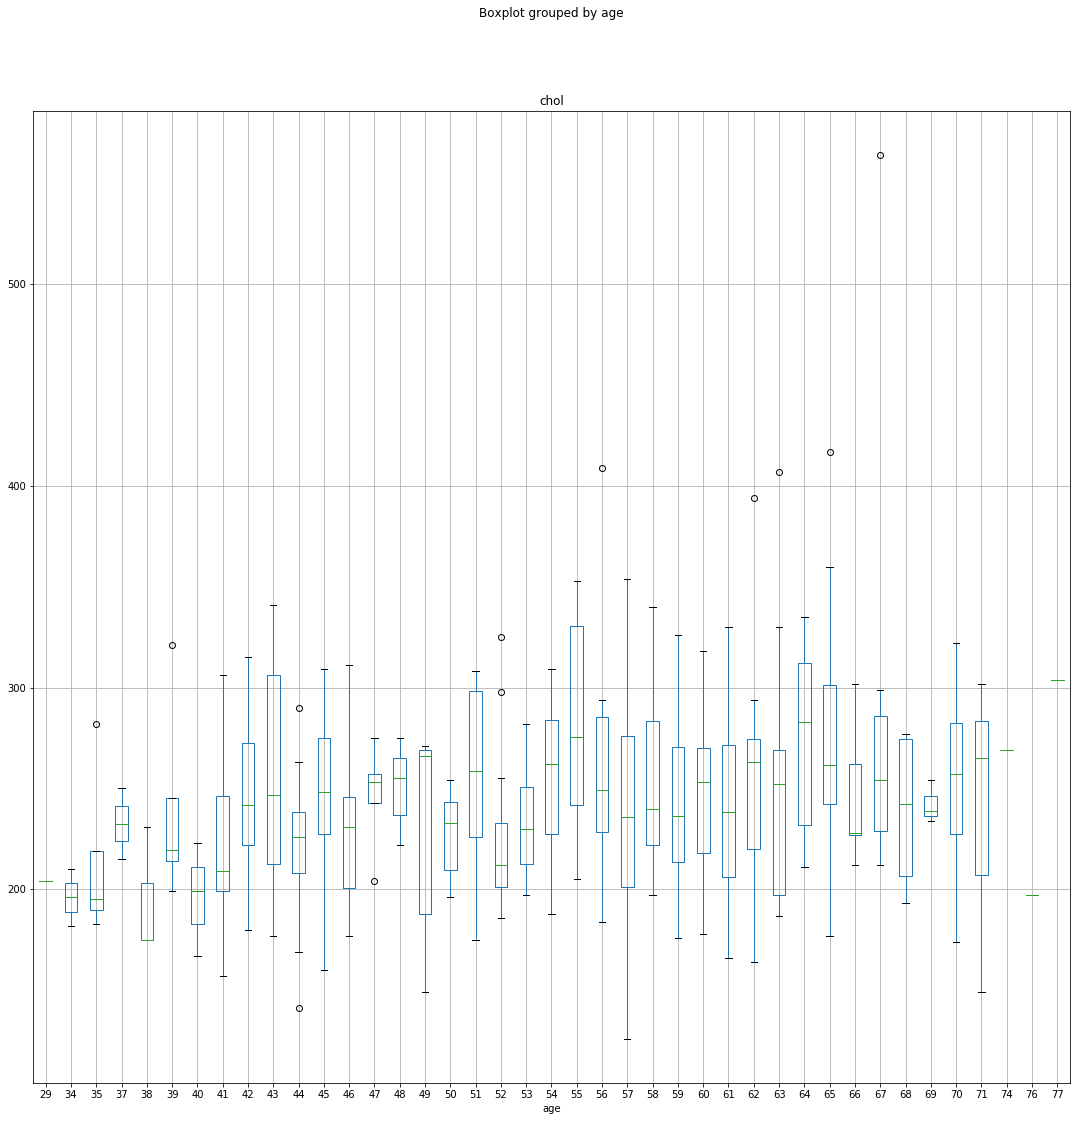

In [29]:
#checking for outliers . First lets check Cholesterol

#boxplot between age and chol
hd.boxplot(column='chol',by='age', figsize=(18,18))
plt.show()



In [30]:
#Lets find out the value of mean and standard deviation of cholesterol column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_chol = hd['chol'].mean()
std_chol = hd['chol'].std()
thershold_value = 3*std_chol
lower, upper=mean_chol - thershold_value, mean_chol + thershold_value

mean_chol,std_chol,thershold_value,lower,upper



(246.26402640264027,
 51.830750987930045,
 155.49225296379012,
 90.77177343885015,
 401.75627936643036)

In [31]:
#As per the above box plot I could see there are 4 cholesterol points which are above 400 . lets now examine the other features for this cholesterol outliers. Now as per above we have set the upper and lower bounderies for cholesterol
#finding the ones which is above the upper limit
highchol = hd[hd.chol>400]
highchol



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2.0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3.0,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3.0,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3.0,0


In [32]:
#Now lets examine the data above and determine whether to remove or not. out of these 4 there are 2 data points which has target as 0
#that means they dont have heart disease. this is not creating any impact on the target so I am keeping these. For the index 28 & 85 rest all features looks good not removing this as well.
# For these 4 data points will replace their value with their mean values as other feature data looks informative and reasonable values

hd4 = hd[hd.chol < 400]
hd4p=hd4.loc[hd4.loc[:,'target']==1]
hd4a=hd4.loc[hd4.loc[:,'target']==0]

print("Mean serum cholesterol in those with heart disease is:", hd4p.chol.mean())
print("Mean serum cholesterol in those without heart disease is:", hd4a.chol.mean())

hd['chol']=hd['chol'].replace([417,564], 240)
hd['chol']=hd['chol'].replace([407, 409], 249)

# Lets verify if the outliers are replaced

highchol = hd[hd.chol>400]
highchol






Mean serum cholesterol in those with heart disease is: 239.1840490797546
Mean serum cholesterol in those without heart disease is: 248.77941176470588


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [33]:
# finding the ones which is below the lower limit

lowchol = hd[hd.chol<91]
lowchol

# There is no outliers on the lower limit

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Next will go with Trestbps

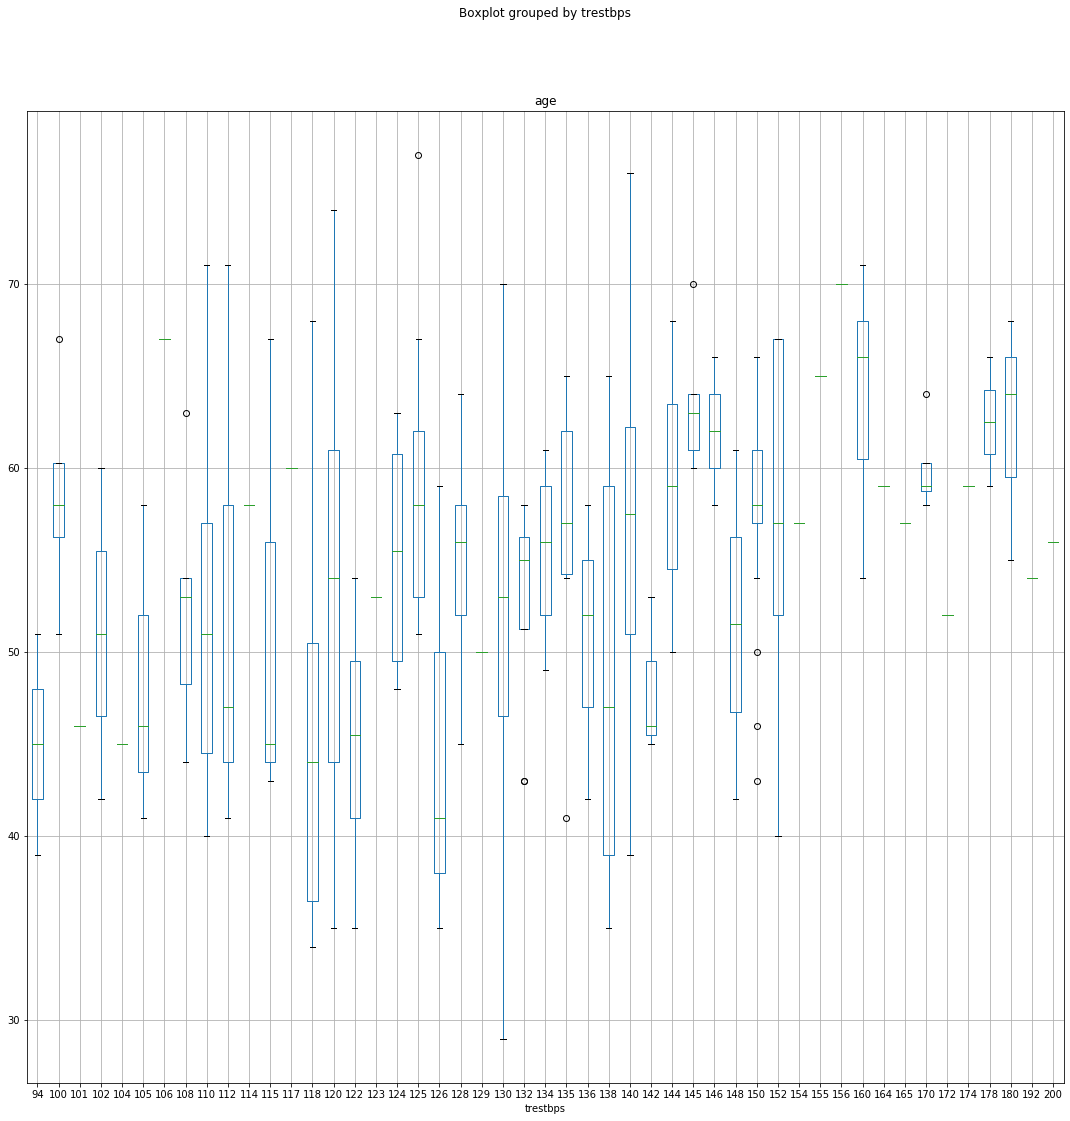

In [34]:
hd.boxplot(column='age',by='trestbps',figsize=(18,18))
plt.show()


In [35]:
#Lets find out the value of mean and standard deviation of trestbps column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_trestbps = hd['trestbps'].mean()
std_trestbps = hd['trestbps'].std()
thershold_value = 3*std_trestbps
lower, upper=mean_trestbps - thershold_value, mean_trestbps + thershold_value

mean_trestbps,std_trestbps,thershold_value,lower,upper



(131.62376237623764,
 17.53814281351709,
 52.61442844055127,
 79.00933393568636,
 184.23819081678892)

In [36]:
#As per the above box plot I could see there are 2 trestbps points which are above 184 . lets now examine the other features for this cholesterol outliers. Now as per above we have set the upper and lower bounderies for trestbps
#finding the ones which is above the upper limit
hightrestbps = hd[hd.trestbps>184]
hightrestbps

#Looking at the data ,people with high bp is not having heart disease. Other features values also looks reasonable. trestbps values are not too high from the upper limit.I am planning to keep the data as it is.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3.0,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3.0,0


In [37]:
#finding the ones which is above the lower limit
lowtrestbps = hd[hd.trestbps<79]
lowtrestbps

# There is no outliers on the lower limit


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Next will go with thalach

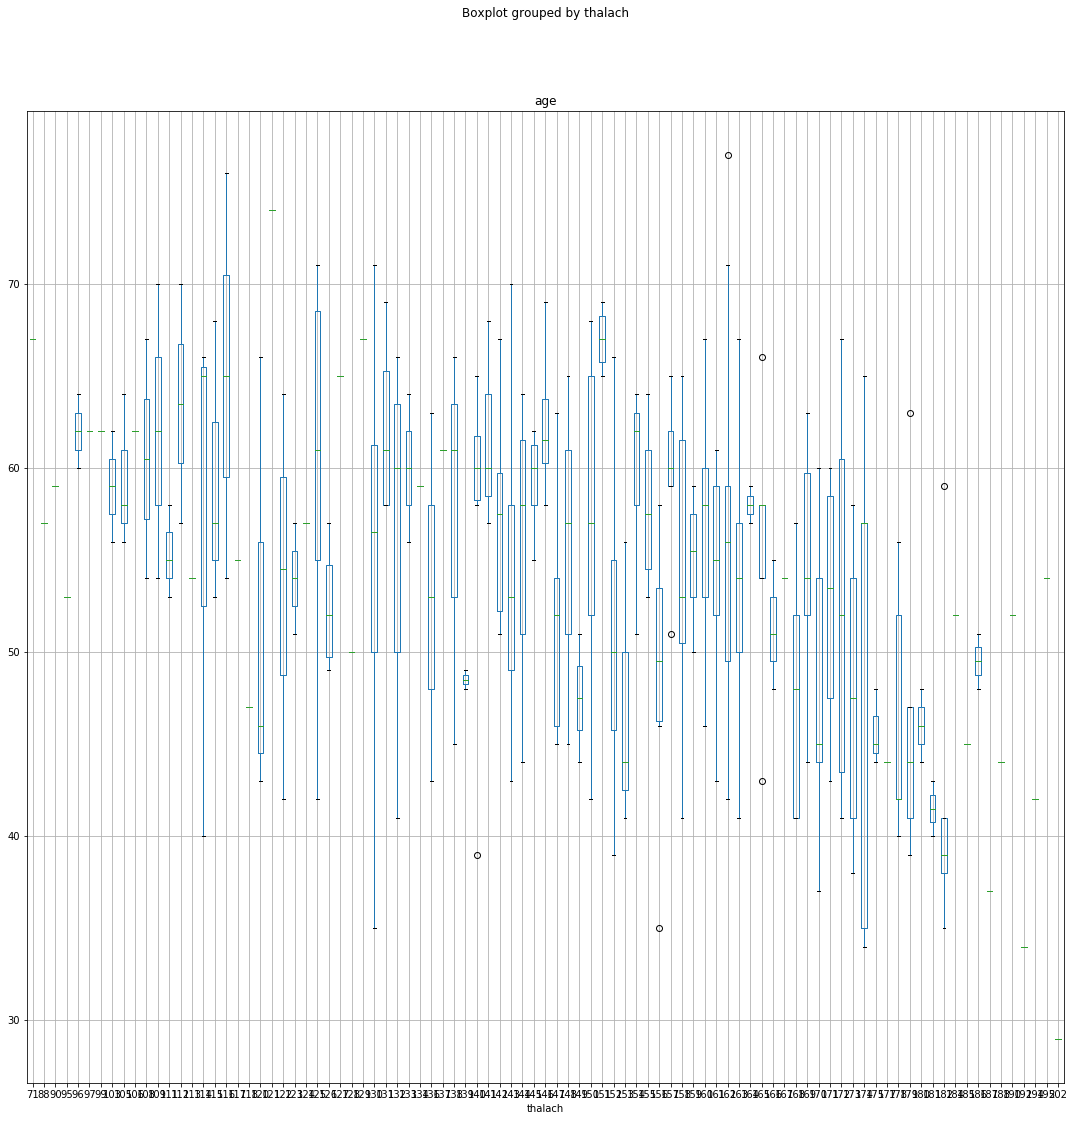

In [38]:
hd.boxplot(column='age',by='thalach',figsize=(18,18))
plt.show()


In [39]:
#Lets find out the value of mean and standard deviation of thalach column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_thalach = hd['thalach'].mean()
std_thalach = hd['thalach'].std()
thershold_value = 3*std_thalach
lower, upper=mean_thalach - thershold_value, mean_thalach + thershold_value

mean_thalach,std_thalach,thershold_value,lower,upper


(149.64686468646866,
 22.905161114914087,
 68.71548334474227,
 80.9313813417264,
 218.36234803121093)

In [40]:

#finding the ones which is above the upper limit
highthalach = hd[hd.thalach>218]
highthalach

# There is no outliers on the upper limit


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [41]:
#finding the ones which is above the lower limit
lowthalach = hd[hd.thalach<81]
lowthalach

#there is one outlier on the lower limit. thats way too low from the mean but still other features looks reasonable. I am going to keep it as it is

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2.0,0


Now lets find the mean and SD for the overall dataframe to decide which other features I need to analyze for the outliers

In [42]:
    mean = hd.mean()
    SD = hd.std()
mean,SD

# according to the below table, it doesn't make any sense to look for outliers on the age column as age is a fact and value we cannot change/remove.
# sex is a binary value and we cannot change the value of it
#CP is a binary value and we cannot find outliers for these values
#fbs is a binary value and we cannot find outliers for these values
#restecg is a binary value and we cannot find outliers for these values
#exang is a binary value and we cannot find outliers for these values
#oldpeak is a binary value and we cannot find outliers for these values
#slope is a binary value and we cannot find outliers for these values
#ca is a binary value and we cannot find outliers for these values
#thal is a binary value and we cannot find outliers for these values



(age          54.366337
 sex           0.683168
 cp            0.966997
 trestbps    131.623762
 chol        243.561056
 fbs           0.148515
 restecg       0.528053
 thalach     149.646865
 exang         0.326733
 oldpeak       1.039604
 slope         1.399340
 ca            0.676568
 thal          2.330033
 target        0.544554
 dtype: float64, age          9.082101
 sex          0.466011
 cp           1.032052
 trestbps    17.538143
 chol        45.555970
 fbs          0.356198
 restecg      0.525860
 thalach     22.905161
 exang        0.469794
 oldpeak      1.161075
 slope        0.616226
 ca           0.953043
 thal         0.583994
 target       0.498835
 dtype: float64)

In [43]:
# finding the correlation matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.182278,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.336993,0.065157,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.137902,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.089099,0.215154,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.102289,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.209512,-0.174156,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.142709,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.103635,0.059365,-0.144931
chol,0.182278,-0.137902,-0.102289,0.142709,1.000000,0.003827,-0.112066,-0.028446,0.092901,0.014772,0.013106,0.090909,0.048278,-0.104995
fbs,0.121308,0.045032,0.094444,0.177531,0.003827,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.132212,0.002364,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.112066,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.100764,-0.008683,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.028446,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.247190,-0.113545,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.092901,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.133267,0.233257,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.014772,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.282726,0.209692,-0.430696


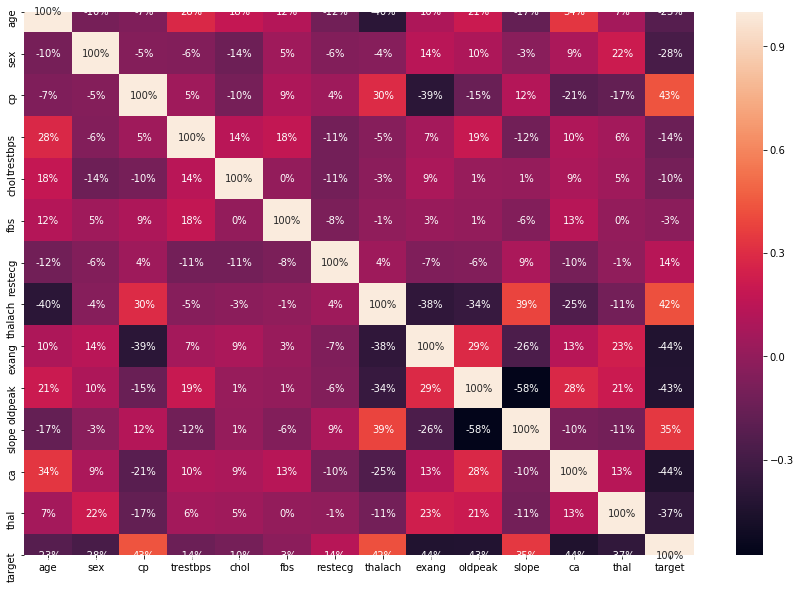

In [44]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(hd.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()


In [45]:
#finding the count of people having heart disease and without heart disease
hd.target.value_counts()


1    165
0    138
Name: target, dtype: int64

# Visualisation of data with different features along with target

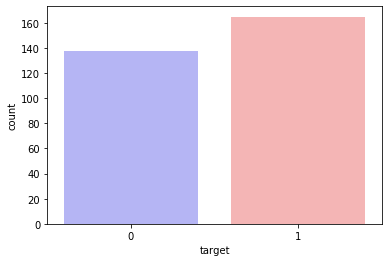

In [46]:
#plotting the graph as per target
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()


In [47]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hd.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hd.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Text(0.5, 1.0, 'Frequency')

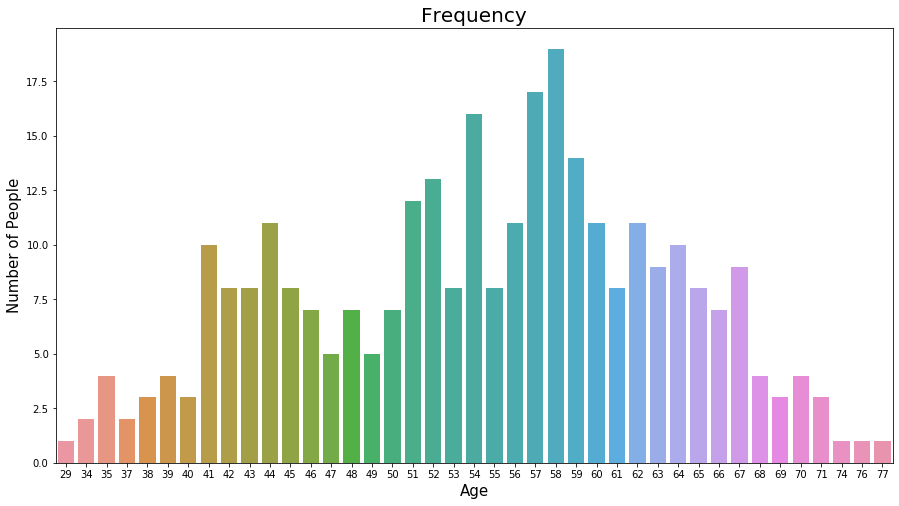

In [48]:
#no of people having heart disease based on age
plt.figure(figsize = (15,8))
sns.countplot(hd['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


Text(0.5, 1.0, 'Histogram')

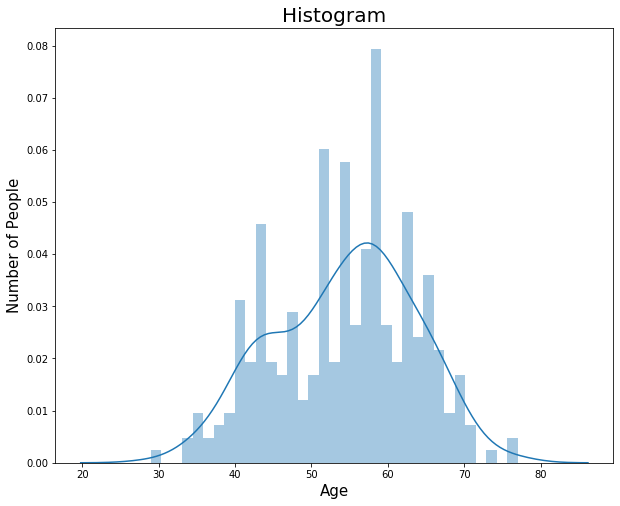

In [49]:
#Plotting the Distribution of Age. 
#Histogram
plt.figure(figsize = (10,8))
sns.distplot(hd['age'], bins = 35, kde = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Histogram', fontsize = 20)


Text(0.5, 1.0, 'Frequency')

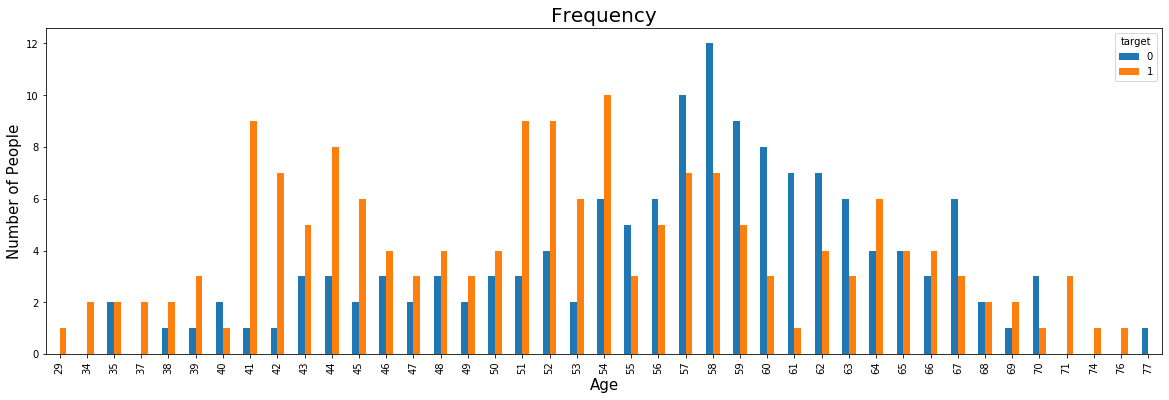

In [50]:
#lets crosstabs for age and target.
pd.crosstab(hd.age,hd.target).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


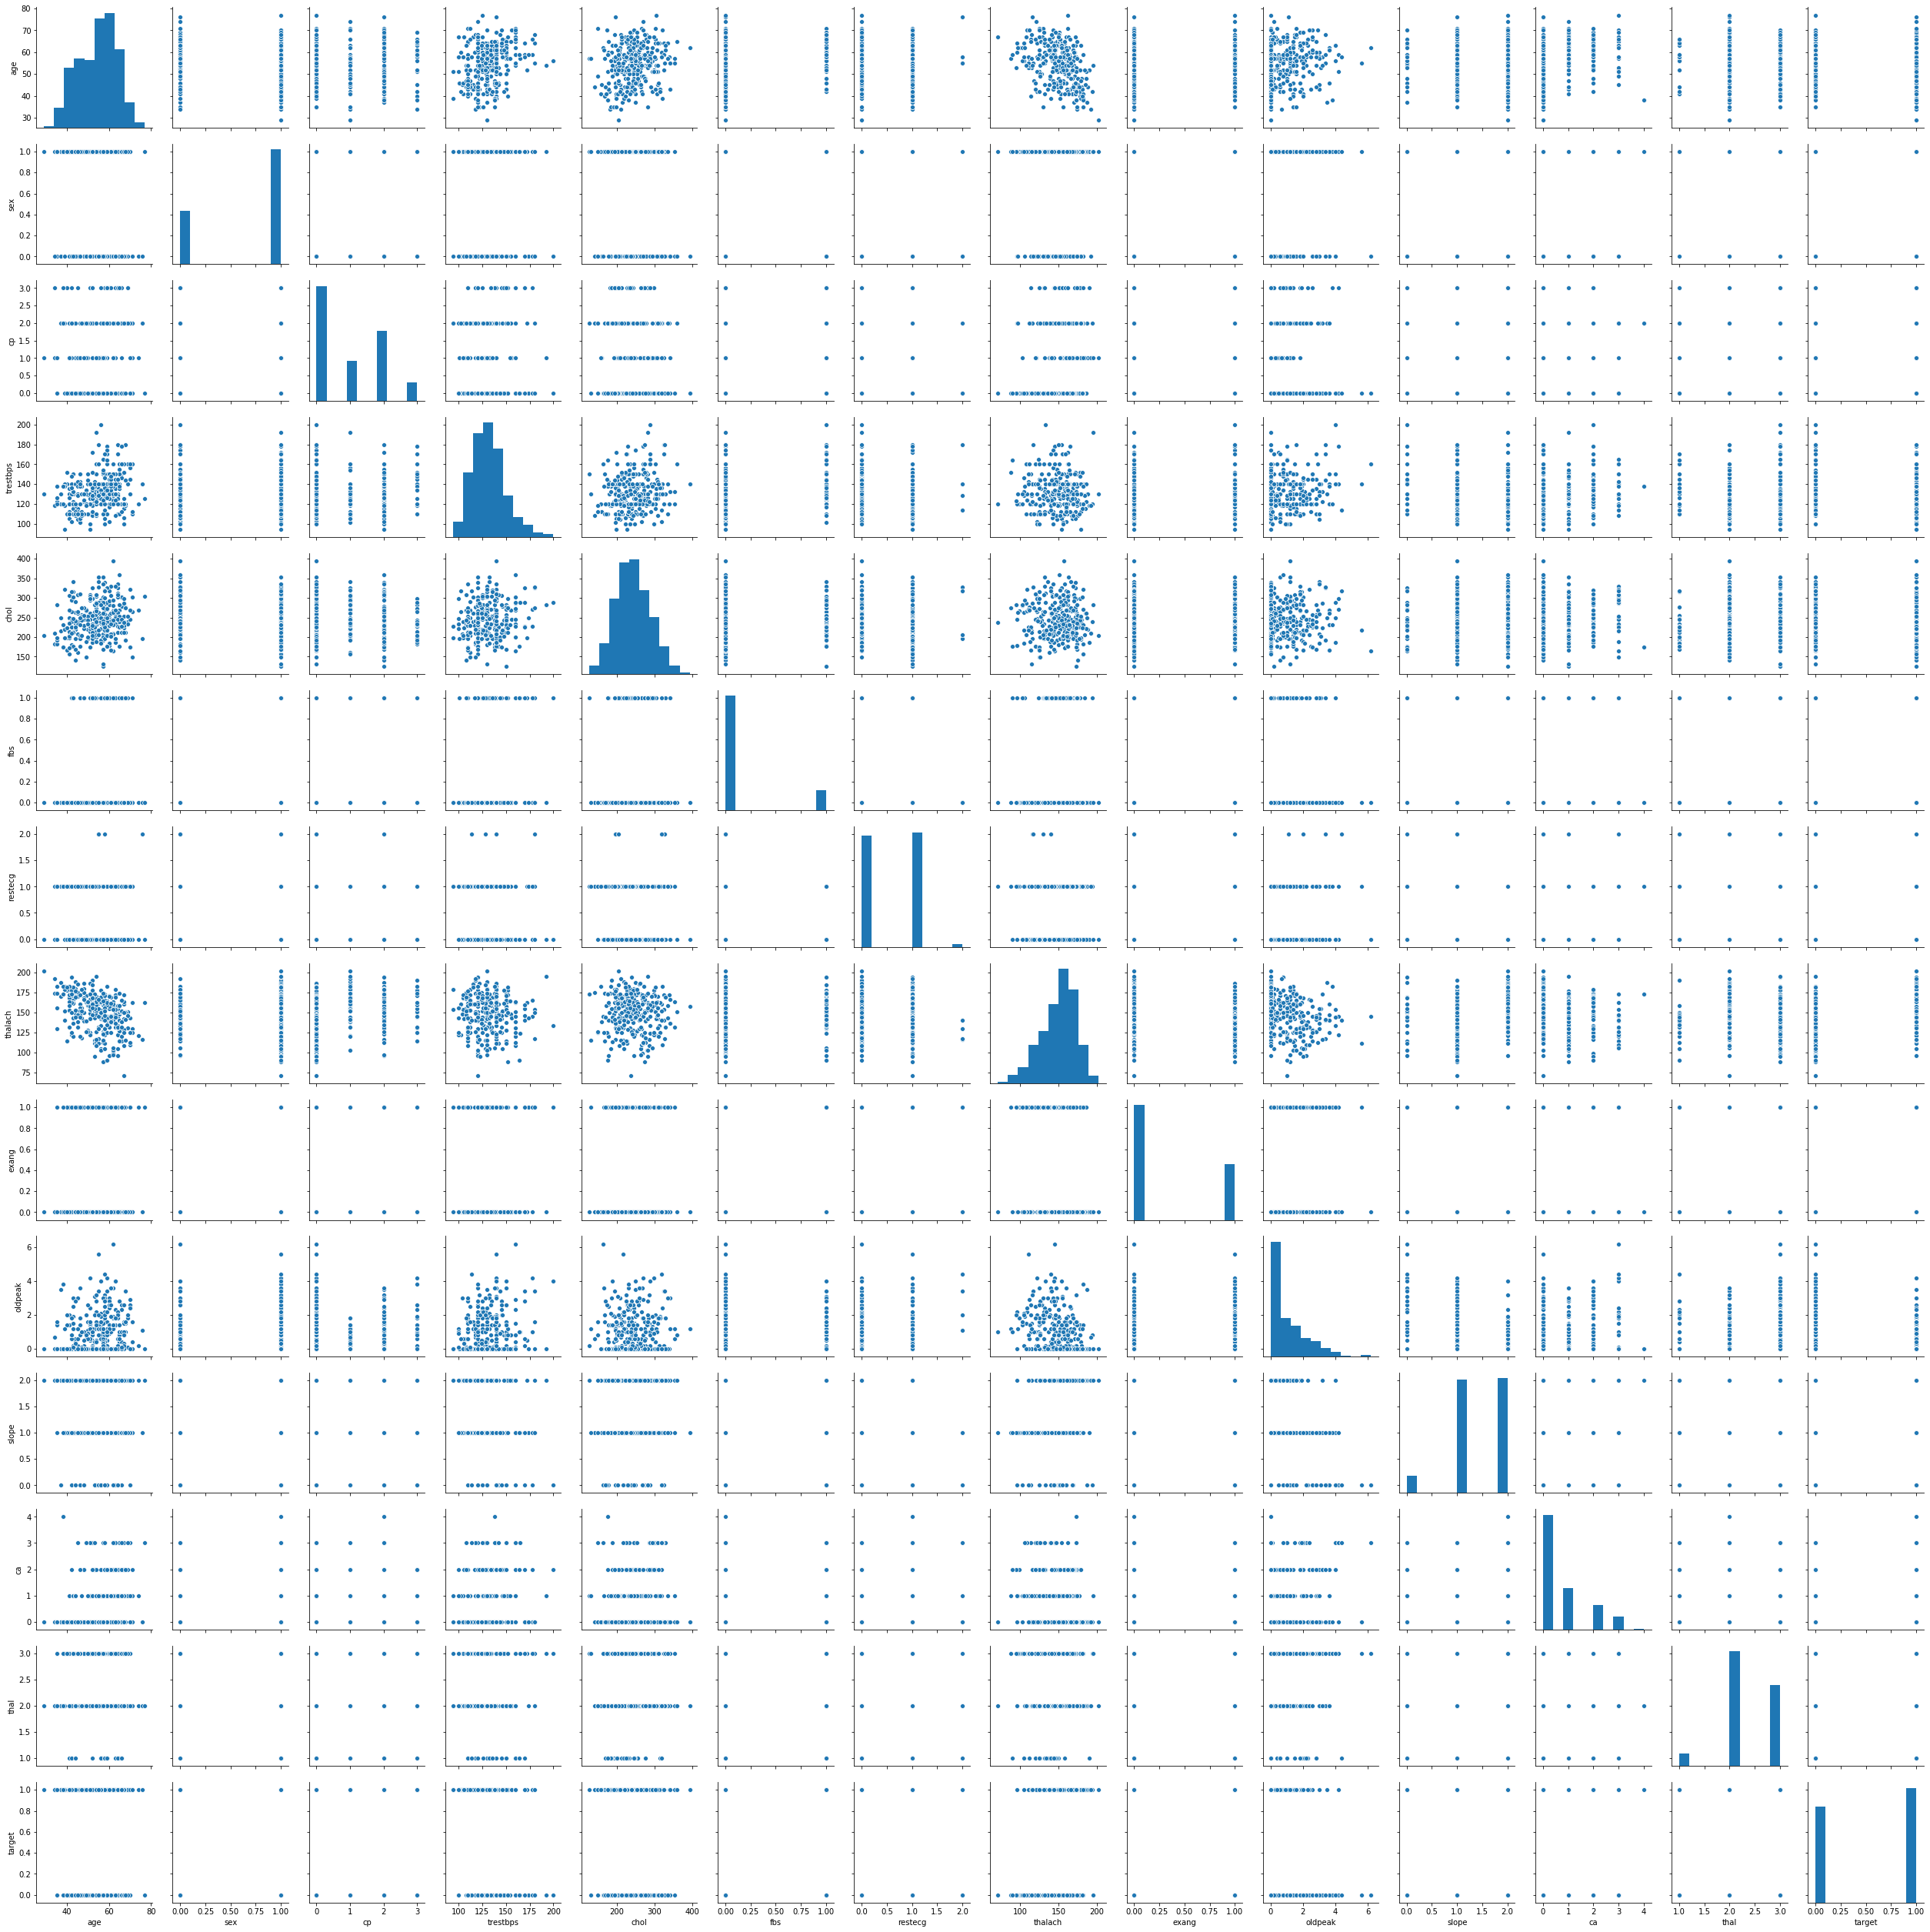

In [51]:
#finding correlation with all features
sns.pairplot(hd);


In [52]:
# correlation found between age & testbps , age & chol, chol & testbps, testbps & thalach, thalach & chol,thalach & age, age & old peak, old peak & testbps, old peak & chol,

# Creating age group to identify the heartdisease based on a group

In [53]:
#creating age bins for certain age group
hd['age']=hd['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
hd['age_group']=pd.cut(hd['age'],bins,labels=labels)
hd.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1,Senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1,Young Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1,Young Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1,Adult


# Plotting graph between certain features and target

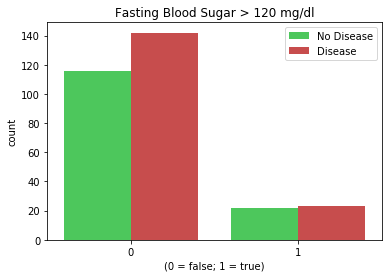

In [54]:
# plot fbs (fasting blood sugar) 
target_colors = ["#39db4d", "#db3939"]

sns.set_palette(target_colors)
sns.countplot(hd.fbs, hue=hd.target)
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()


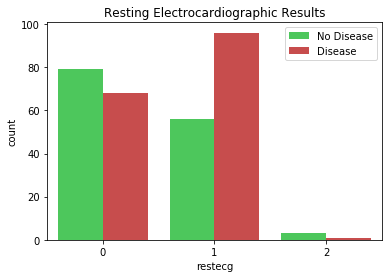

In [55]:
# plot restecg (resting electrocardiographic results) 
sns.set_palette(target_colors)
sns.countplot(hd.restecg, hue=hd.target)
plt.title("Resting Electrocardiographic Results")
plt.legend(["No Disease", "Disease"])
plt.show()


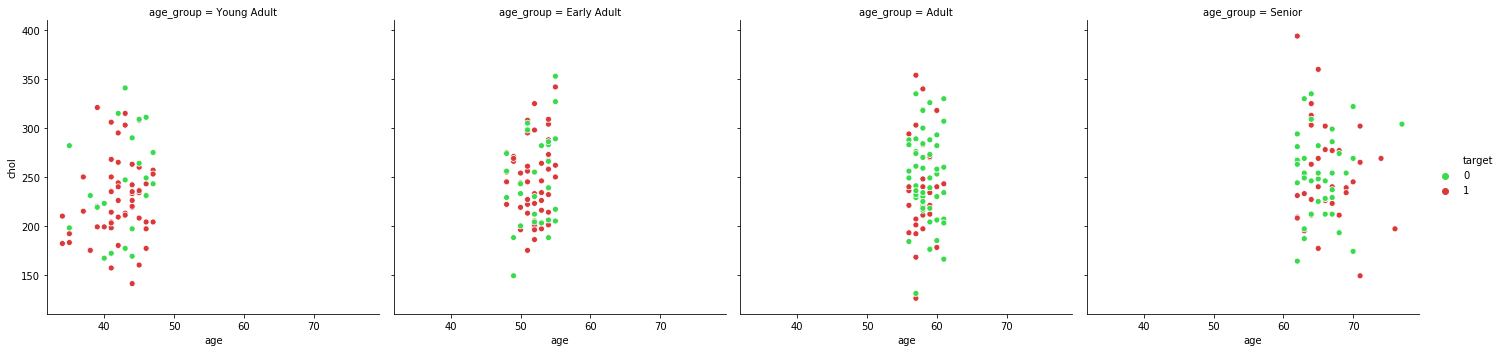

In [56]:
#plotting graph between age and chol
sns.relplot(x="age", y="chol", hue="target",
            col="age_group", data=hd);


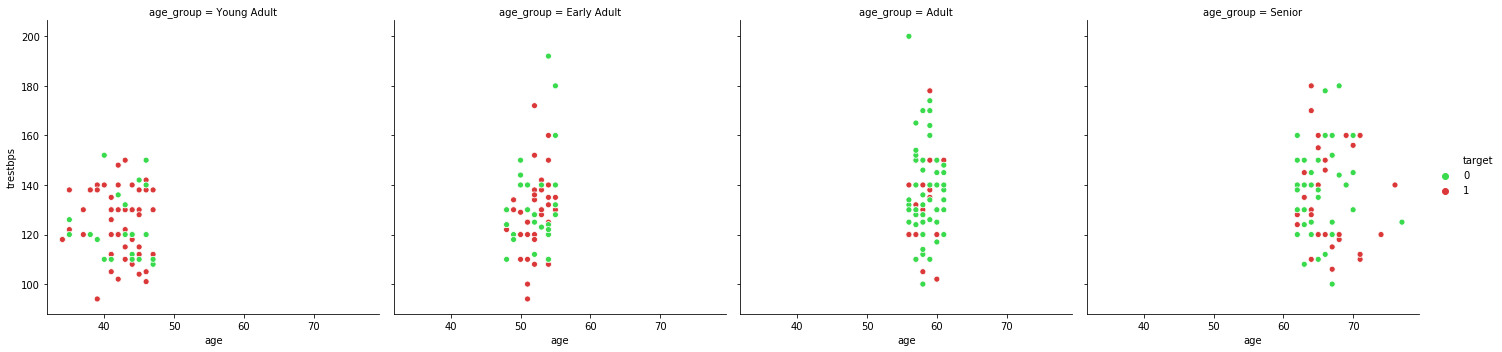

In [57]:
#plotting graph between age and trestbps

sns.relplot(x="age", y="trestbps", hue="target",
            col="age_group", data=hd);


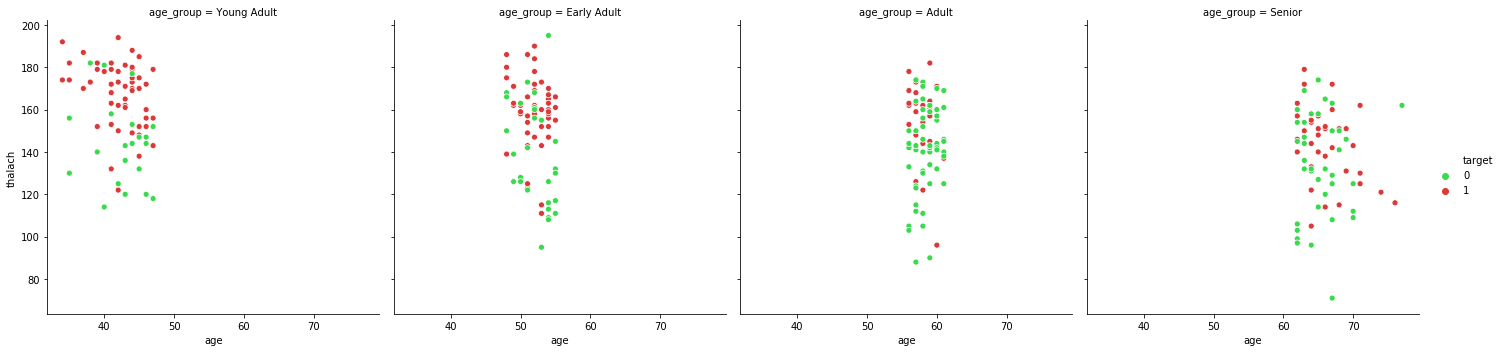

In [58]:
#plotting graph between age and thalach

sns.relplot(x="age", y="thalach", hue="target",
            col="age_group", data=hd);


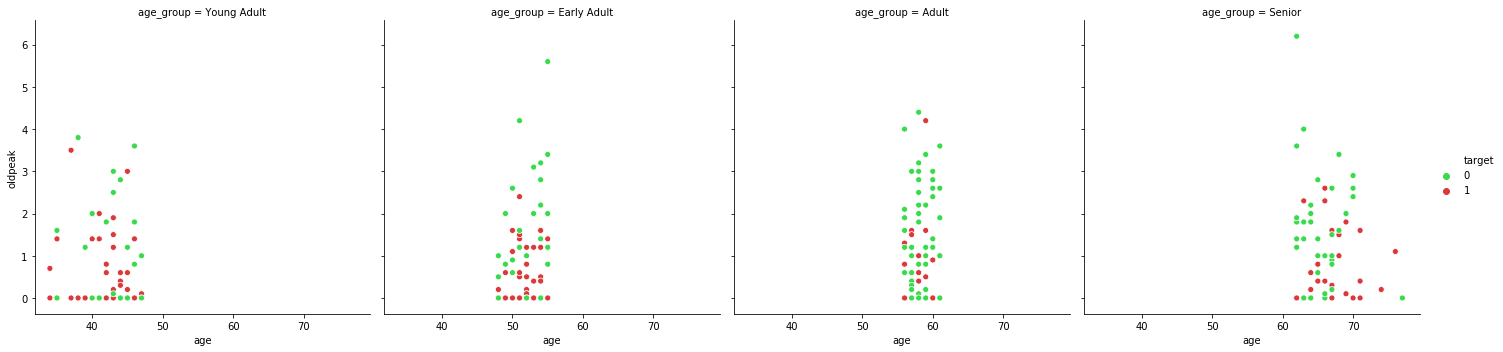

In [59]:
#plotting graph between age and oldpeak

sns.relplot(x="age", y="oldpeak", hue="target",
            col="age_group", data=hd);


Text(0.5, 1.0, 'Percentage of people as per chest pain type')

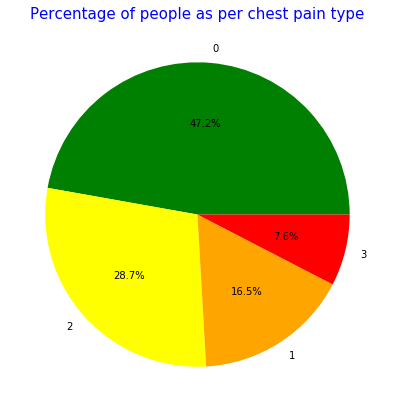

In [60]:
#plotting pie graph based on chest pain type
hd.cp.dropna(inplace = True)
labels = hd.cp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = hd.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of people as per chest pain type',color = 'blue',fontsize = 15)

# Filtering

In [61]:
#filtering
Earlyadult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Early Adult") & (hd.cp>1)]
Earlyadult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2.0,1,Early Adult
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2.0,1,Early Adult
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3.0,1,Early Adult


In [62]:
adult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Adult") & (hd.cp>1)]
adult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2.0,1,Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3.0,1,Adult
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3.0,0,Adult
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2.0,0,Adult


In [63]:
senior_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Senior") & (hd.cp>1)]
senior_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2.0,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2.0,1,Senior
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2.0,1,Senior
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3.0,1,Senior
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2.0,1,Senior
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2.0,1,Senior
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2.0,0,Senior
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3.0,0,Senior
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2.0,0,Senior
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3.0,0,Senior


In [64]:
overallpeople=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.cp>1)]
overallpeople

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2.0,1,Adult
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2.0,1,Early Adult
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2.0,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2.0,1,Senior
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2.0,1,Early Adult
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2.0,1,Young Adult
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2.0,1,Young Adult
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2.0,1,Senior
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3.0,1,Early Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3.0,1,Adult


In [65]:
hd = hd.drop('age_group',axis =1)
hd.head(5)
hd.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


# Feature Engineering

Finding feature importance
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Lets find out which feature has the higher score by running the feature importance using random forest

In [67]:
#using random forest finding feature importance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hd.drop('target', 1), hd['target'], test_size = .2, random_state=10) #split the data


In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2 (0.190697)
2. feature 11 (0.115316)
3. feature 7 (0.104316)
4. feature 12 (0.099988)
5. feature 4 (0.094537)
6. feature 9 (0.085230)
7. feature 3 (0.069857)
8. feature 0 (0.063935)
9. feature 8 (0.054529)
10. feature 1 (0.044672)
11. feature 10 (0.044308)
12. feature 6 (0.019675)
13. feature 5 (0.012939)


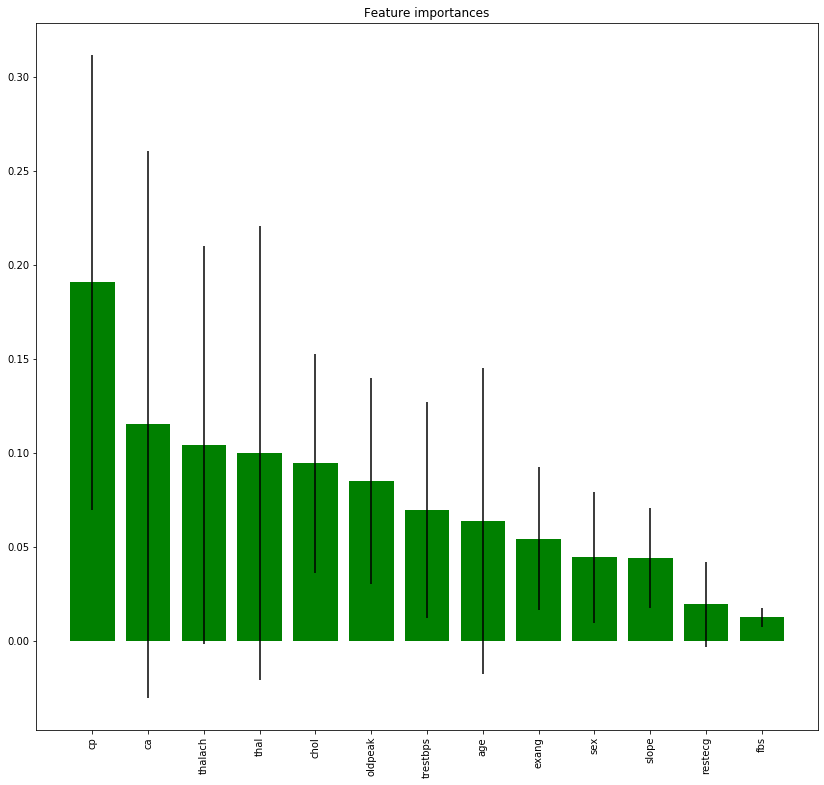

In [69]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Conclusion : After doing analysis on the data there are my observations from overall dataset
1. Lets start with target feature where 0 means "no heart disease" and 1 means " have heart disease". This dataset is fair because percentage of people having heart disease is 54% and ones not having heart disease is 47%. Not much difference its equally biased results
2. Age : I could see age group ranges from young people to senior people.
3. Looks like young adult(age 29 to 47) and early adult( age 47 to 55)are more prone to heart disease according to this dataset. These age group has high cholesterol ,trestbps,thalach and oldpeaklevels which is causing this heart disease.
4. Accoring to data, 7.6% people are having cp type 3, 47% are having cp type 0,16.6% cp type 1, 28% cp type 2. this data is good as less percentage of people in cp type 2 and 3.
5. Correlation matrix shows there is a correlation between cholesterol,trestbps,thalach and old peak. 
6. Its pretty clean dataset with no missing values and sample size looks small.
7. Its more of binary classification problem .
8. According to feature importance top 5 features looks like(old peak,thalach,cp,chol,age).


Export this clean data set into csv file to create a model

In [70]:
HeartDisease = hd.to_csv (r'C:\Users\sange\HeartDisease_clean.csv', index = None, header=True) 